<a href="https://colab.research.google.com/github/NayanaMarques/ANN_2021/blob/master/ANN_Image_Processig/Recycle_004_Image_Processing_some_concepts_before_first_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
from google.colab import files

In [31]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

Cloning into 'ANN_2021_01'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 395 (delta 13), reused 0 (delta 0), pack-reused 369
Receiving objects: 100% (395/395), 75.25 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (222/222), done.
/content/ANN_2021_01/ANN_2021_01/ANN_2021_01


In [32]:
import zipfile
file_name = zipfile.ZipFile('trash.zip', 'r')
file_name.extractall()

In [33]:
# all images are load in variable x...
FILE='trash.zip'
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x_gray.append(cv2.imread(name, 0))
        x_gray.append(cv2.resize(cv2.imread(name, 0),(80,60)))

In [34]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [35]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [36]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [37]:
unique_list

['car', 'gla', 'met', 'pap', 'pla', 'tra']

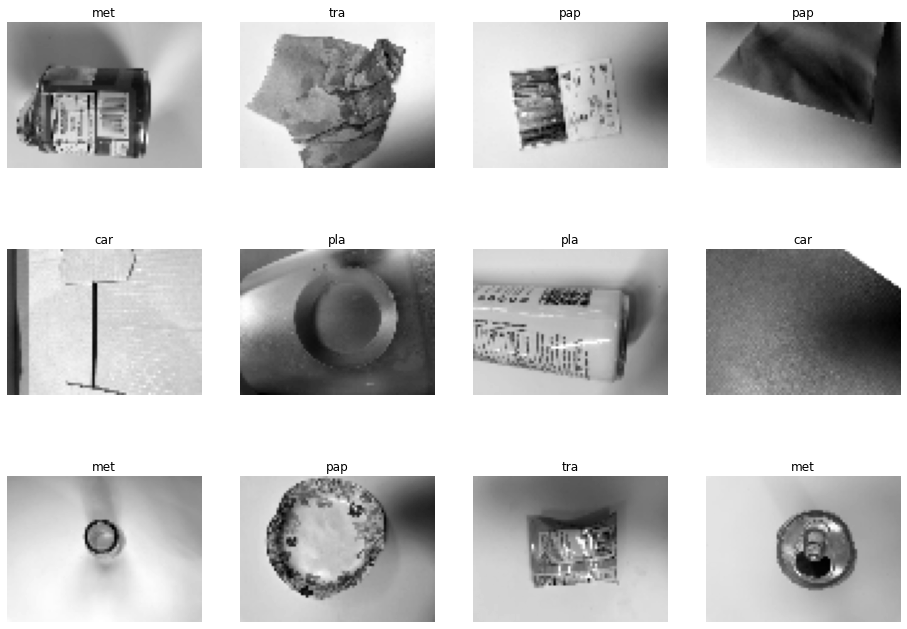

In [38]:
# view some images from the train_ds
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk], cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")

In [39]:
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel())

df = pd.DataFrame(x_data)
print(df)

     0     1     2     3     4     5     ...  4794  4795  4796  4797  4798  4799
0     214   211   210   212   209   201  ...    94    93    95    94    93    94
1     220   220   219   213   215   211  ...    81    80    78    74    73    73
2     209   207   208   207   211   208  ...    62    61    76    43    57    76
3     194   194   190   190   190   188  ...   211   211   212   212   215   214
4     120   119   119   110    99   129  ...   125   132   130   132   133   133
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
668   214   214   214   214   215   216  ...   184   183   181   178   176   174
669   214   215   214   214   215   215  ...   167   165   163   158   154   152
670   205   205   204   205   205   206  ...   159   157   154   151   148   145
671   196   197   199   199   201   201  ...   150   145   142   137   134   130
672   198   200   202   204   204   205  ...   186   184   182   177   175   171

[673 rows x 4800 columns]


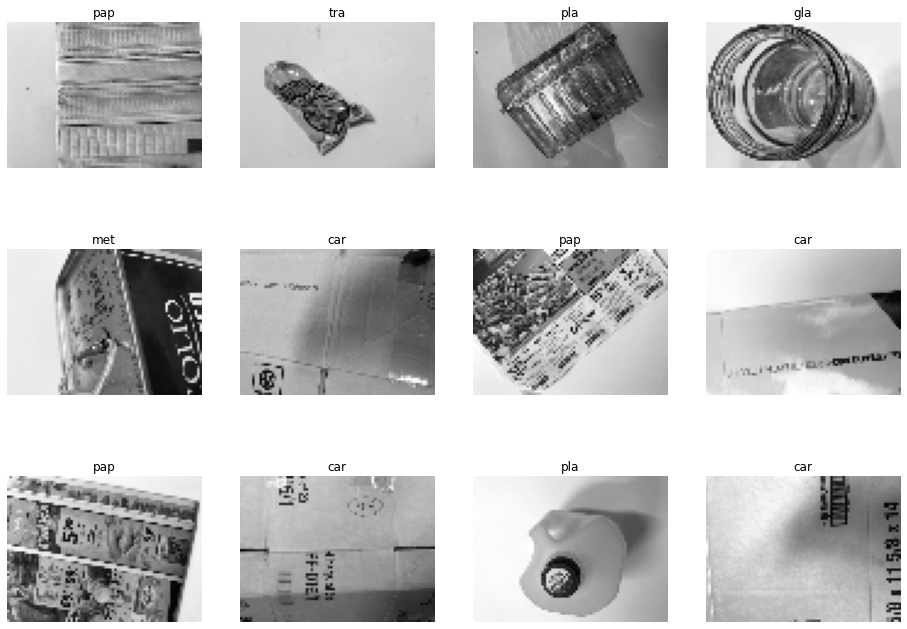

In [40]:
nrows, ncols = df.shape
# view some images from the train_ds
num = nrows
plt.figure(figsize=(16, 16))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num)
  img_gray = np.array(df.iloc[kk,:]).reshape(60,80)
  plt.imshow(img_gray, cmap='gray')
  plt.title(y_names[kk])
  plt.axis("off")

In [41]:
for kk, yy in enumerate(y_names):
  if(yy == 'car'):
    y_names[kk]='cardboard'
  elif(yy == 'met'):
    y_names[kk]='metal'
  elif(yy == 'pap'):
    y_names[kk]='paper'
  elif(yy == 'pla'):
    y_names[kk]='plastic'
  else:
    y_names[kk]= 'trash'

In [42]:
df['type'] = y_names
df['class'] = y

In [43]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4762,4763,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,4784,4785,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799,type,class
0,214,211,210,212,209,201,189,196,200,204,202,204,199,201,202,200,202,200,206,203,204,205,201,199,202,201,201,203,205,200,202,198,199,199,199,199,203,200,198,203,...,130,130,127,132,131,130,126,126,126,127,128,122,124,125,127,122,124,120,122,119,124,126,121,116,122,119,114,109,100,96,96,94,94,93,95,94,93,94,cardboard,0
1,220,220,219,213,215,211,210,209,214,214,208,205,205,208,214,213,198,205,210,213,203,206,202,194,194,195,202,199,200,198,204,194,190,190,196,191,196,194,189,193,...,151,155,149,154,149,144,139,135,128,167,158,152,138,124,108,99,95,96,92,94,92,93,92,91,91,90,85,85,84,83,80,80,81,80,78,74,73,73,cardboard,0
2,209,207,208,207,211,208,205,207,205,198,211,200,211,212,213,213,169,206,225,62,58,61,203,204,156,56,119,201,199,203,203,200,200,201,200,201,199,198,198,193,...,111,111,109,109,107,107,106,101,96,96,96,92,90,87,83,84,82,84,81,75,62,84,67,41,54,58,63,58,56,60,48,40,62,61,76,43,57,76,cardboard,0
3,194,194,190,190,190,188,186,170,115,114,116,114,113,114,112,116,55,36,40,41,43,44,50,51,49,56,55,62,52,57,56,57,68,78,74,68,56,76,93,87,...,192,191,184,186,193,190,192,193,189,201,203,204,228,182,161,81,94,63,51,39,169,170,171,185,204,206,206,207,209,210,210,210,211,211,212,212,215,214,cardboard,0
4,120,119,119,110,99,129,155,174,169,180,177,186,189,197,197,196,201,200,204,203,196,206,205,200,204,205,203,205,207,207,197,199,208,200,193,200,196,192,192,185,...,82,82,83,90,93,91,95,99,108,104,107,109,107,113,113,114,118,125,123,123,131,125,135,138,134,129,135,127,127,123,132,130,125,132,130,132,133,133,cardboard,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,214,214,214,214,215,216,216,216,216,217,217,217,217,218,218,218,218,218,218,217,217,219,219,219,219,219,219,219,219,219,218,219,219,218,219,219,219,218,219,218,...,173,182,182,176,174,178,190,193,194,194,194,194,193,192,189,193,191,189,193,193,191,190,190,188,190,190,190,189,188,187,186,185,184,183,181,178,176,174,trash,5
669,214,215,214,214,215,215,215,216,216,216,217,217,217,217,217,218,218,218,219,219,218,218,217,219,220,219,219,219,219,219,219,218,218,218,218,218,218,217,217,216,...,191,194,194,192,193,192,183,193,194,194,194,195,194,193,193,192,192,190,192,190,190,189,184,186,185,184,182,178,178,176,173,171,167,165,163,158,154,152,trash,5
670,205,205,204,205,205,206,208,208,209,209,210,210,210,210,210,204,210,211,211,211,212,212,212,211,212,212,212,211,212,212,210,210,210,210,210,210,209,209,209,208,...,191,191,191,191,187,183,185,180,177,177,176,179,175,175,175,175,183,184,183,182,181,180,179,178,178,175,174,173,169,165,163,163,159,157,154,151,148,145,trash,5
671,196,197,199,199,201,201,204,203,204,206,206,207,207,208,208,209,209,209,210,209,210,212,212,212,212,213,213,213,213,214,215,215,214,214,215,215,216,216,215,216,...,211,210,210,209,208,208,208,207,207,207,205,205,204,203,202,199,197,195,192,190,187,185,182,178,177,173,170,166,163,160,156,153,150,145,142,137,134,130,trash,5


In [44]:
Arq = "Recycle_jun_10_2021.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>